# EDA 

In [47]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# display multiple outputs, default is 'last_expr' (last expression)
# http://ipython.readthedocs.io/en/stable/config/options/terminal.html
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as sa
import psycopg2 as pg
import seaborn as sns

from psycopg2.extras import execute_values

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

### Pull down all features

In [48]:
query = '''
    SELECT *
    FROM prod.features
    WHERE "Season Type" = 'NCAA Tourney' and
        holdout_s1 = 0 and
        holdout_s2 = 0
'''

conn = pg.connect(database='postgres',
                  user='postgres',
                  password='w207final',
                  host='35.185.225.167')

df = pd.read_sql_query(query, conn)

In [49]:
df.dtypes.value_counts()
df.describe().T

float64    18
int64      11
object      2
dtype: int64

,count,mean,std,min,25%,50%,75%,max
Season,1426.0,2.008050e+03,3.176268,2003.000000,2005.000000,2008.000000,2011.000000,2013.000000
DayNum,1426.0,1.390996e+02,4.218910,134.000000,136.000000,137.000000,139.000000,154.000000
Team,1426.0,1.293577e+03,104.185887,1102.000000,1210.000000,1281.000000,1393.000000,1462.000000
Opponent,1426.0,1.293577e+03,104.185887,1102.000000,1210.000000,1281.000000,1393.000000,1462.000000
Outcome,1426.0,5.000000e-01,0.500175,0.000000,0.000000,0.500000,1.000000,1.000000
Score,1426.0,6.894741e+01,12.066513,29.000000,61.000000,69.000000,77.000000,121.000000
OpponentScore,1426.0,6.894741e+01,12.066513,29.000000,61.000000,69.000000,77.000000,121.000000
NumOT,1426.0,7.433380e-02,0.311331,0.000000,0.000000,0.000000,0.000000,2.000000
holdout_s1,1426.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
holdout_s2,1426.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


See correlation matrix between various features and target

In [52]:
target = ['Outcome']
features = ['AvgRank', 'OpponentAvgRank', 'TwoPointPct_Team', 'ThreePointPct_Team',
            'FreeThrowPct_Team', 'OffensiveRebounds_Team', 'DefensiveRebounds_Team',
            'WinPct', 'OpponentWinPct', 'WinPctDiff', 'SeedDiff',
            'AvgPointsFor', 'AvgPointsAgainst', 'AvgNetPointsFor'
           ]

In [53]:
cm = df[target+features].corr()
cm

,Outcome,AvgRank,OpponentAvgRank,TwoPointPct_Team,ThreePointPct_Team,FreeThrowPct_Team,OffensiveRebounds_Team,DefensiveRebounds_Team,WinPct,OpponentWinPct,WinPctDiff,SeedDiff,AvgPointsFor,AvgPointsAgainst,AvgNetPointsFor
Outcome,1.000000,-0.327037,0.327037,0.114639,0.042056,0.025353,0.141884,0.109606,0.263281,-0.263281,0.369306,-0.505541,0.185305,-0.097735,0.318327
AvgRank,-0.327037,1.000000,0.045002,-0.354994,-0.197787,-0.099024,-0.181190,-0.224631,-0.637091,0.041499,-0.475932,0.618817,-0.389069,0.247336,-0.710886
OpponentAvgRank,0.327037,0.045002,1.000000,-0.026304,0.016745,-0.033172,0.065045,0.069711,0.041499,-0.637091,0.475932,-0.618817,0.046954,0.003155,0.052482
TwoPointPct_Team,0.114639,-0.354994,-0.026304,1.000000,0.271634,0.042533,-0.256864,0.108523,0.435639,0.048650,0.271416,-0.194596,0.365613,-0.046272,0.480154
ThreePointPct_Team,0.042056,-0.197787,0.016745,0.271634,1.000000,0.297759,-0.267675,0.029972,0.257789,0.003874,0.178084,-0.134679,0.370493,0.109849,0.328375
FreeThrowPct_Team,0.025353,-0.099024,-0.033172,0.042533,0.297759,1.000000,-0.269966,-0.094164,0.093644,0.036299,0.040219,-0.016907,0.162855,0.110686,0.081365
OffensiveRebounds_Team,0.141884,-0.181190,0.065045,-0.256864,-0.267675,-0.269966,1.000000,0.353856,0.150147,-0.042935,0.135419,-0.215875,0.459339,0.319495,0.222120
DefensiveRebounds_Team,0.109606,-0.224631,0.069711,0.108523,0.029972,-0.094164,0.353856,1.000000,0.265560,-0.067348,0.233486,-0.241734,0.455721,0.167844,0.370884
WinPct,0.263281,-0.637091,0.041499,0.435639,0.257789,0.093644,0.150147,0.265560,1.000000,-0.016473,0.712907,-0.464410,0.442502,-0.301238,0.828634
OpponentWinPct,-0.263281,0.041499,-0.637091,0.048650,0.003874,0.036299,-0.042935,-0.067348,-0.016473,1.000000,-0.712907,0.464410,-0.018066,-0.003154,-0.018235


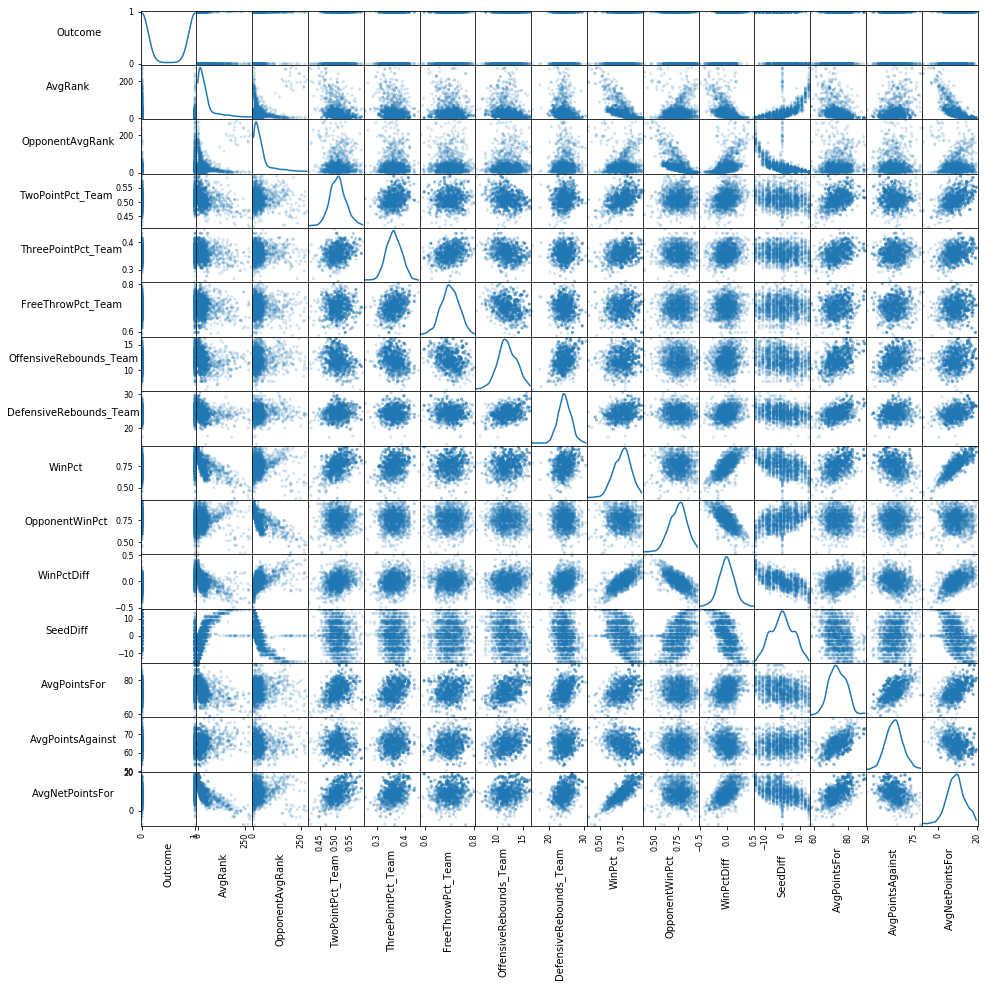

In [54]:
axs = pd.plotting.scatter_matrix(df[target+features], alpha=0.2, figsize=(15, 15), diagonal='kde')
n = len(df[target+features].columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

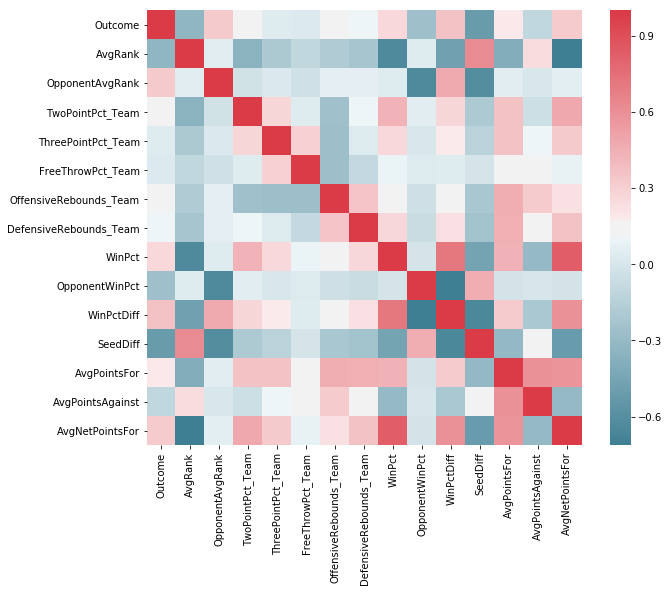

In [55]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, mask=np.zeros_like(cm, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)